In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



In [25]:
def load_diabetes_data():
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
               "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
    data = pd.read_csv(url, header=None, names=columns)
    return data
load_diabetes_data()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1



=== Logistic Regression Evaluation ===
Confusion Matrix:
 [[78 21]
 [19 36]]
Accuracy: 0.7403
Precision: 0.6316
Recall: 0.6545
F1 Score: 0.6429


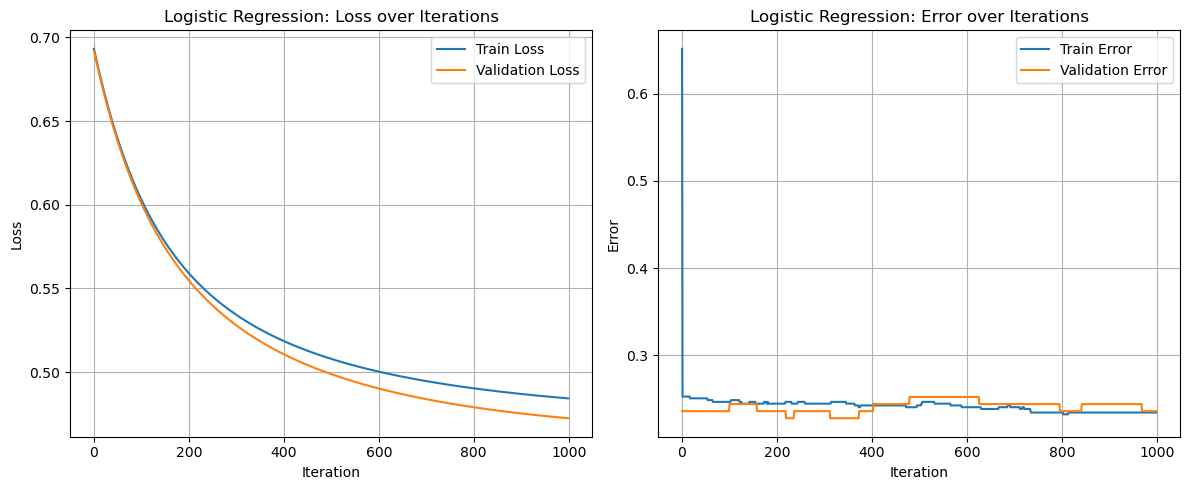


=== Perceptron Evaluation ===
Confusion Matrix:
 [[75 24]
 [23 32]]
Accuracy: 0.6948
Precision: 0.5714
Recall: 0.5818
F1 Score: 0.5766


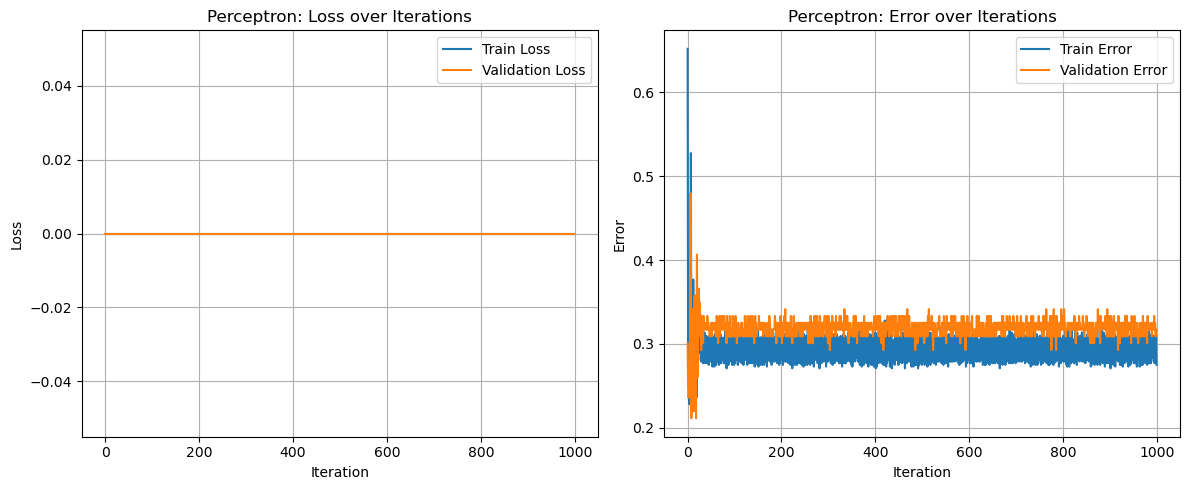

In [26]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log loss
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Misclassification error
def misclassification_error(y_true, y_pred_probs, threshold=0.5):
    y_pred_labels = (y_pred_probs >= threshold).astype(int)
    return np.mean(y_pred_labels != y_true)

# Logistic Regression with validation tracking
def logistic_regression(X_train, y_train, X_val, y_val, learning_rate=0.01, iterations=1000):
    m, n = X_train.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []
    train_errors, val_errors = [], []

    for _ in range(iterations):
        pred_train = sigmoid(X_train @ theta)
        theta -= (learning_rate / m) * (X_train.T @ (pred_train - y_train))

        pred_val = sigmoid(X_val @ theta)

        train_losses.append(log_loss(y_train, pred_train))
        val_losses.append(log_loss(y_val, pred_val))
        train_errors.append(misclassification_error(y_train, pred_train))
        val_errors.append(misclassification_error(y_val, pred_val))

    return theta, train_losses, val_losses, train_errors, val_errors

# Perceptron with validation tracking
def perceptron(X_train, y_train, X_val, y_val, learning_rate=0.01, iterations=1000):
    m, n = X_train.shape
    theta = np.zeros(n)
    train_errors, val_errors = [], []

    for _ in range(iterations):
        pred_train = np.where(X_train @ theta >= 0, 1, 0)
        theta += learning_rate * X_train.T @ (y_train - pred_train)

        pred_val = np.where(X_val @ theta >= 0, 1, 0)
        train_errors.append(np.mean(pred_train != y_train))
        val_errors.append(np.mean(pred_val != y_val))

    return theta, train_errors, val_errors

# Evaluation
def evaluate_model(y_true, y_pred_labels, title=""):
    print(f"\n=== {title} Evaluation ===")
    cm = confusion_matrix(y_true, y_pred_labels)
    acc = accuracy_score(y_true, y_pred_labels)
    prec = precision_score(y_true, y_pred_labels)
    rec = recall_score(y_true, y_pred_labels)
    f1 = f1_score(y_true, y_pred_labels)

    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Plotting
def plot_train_val_curves(train_loss, val_loss, train_err, val_err, model_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'{model_name}: Loss over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(train_err, label='Train Error')
    plt.plot(val_err, label='Validation Error')
    plt.title(f'{model_name}: Error over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Load data
    data = load_diabetes_data()
    X = data.drop("Outcome", axis=1).values
    y = data["Outcome"].values

    # Train/test split
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train/Validation split
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Add bias
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_val = np.c_[np.ones(X_val.shape[0]), X_val]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Logistic Regression
    theta_log, log_train_loss, log_val_loss, log_train_err, log_val_err = logistic_regression(
        X_train, y_train, X_val, y_val, learning_rate=0.01, iterations=1000
    )
    y_pred_log = (sigmoid(X_test @ theta_log) >= 0.5).astype(int)
    evaluate_model(y_test, y_pred_log, "Logistic Regression")
    plot_train_val_curves(log_train_loss, log_val_loss, log_train_err, log_val_err, "Logistic Regression")

    # Perceptron
    theta_perc, perc_train_err, perc_val_err = perceptron(X_train, y_train, X_val, y_val, learning_rate=0.01, iterations=1000)
    y_pred_perc = np.where(X_test @ theta_perc >= 0, 1, 0)
    evaluate_model(y_test, y_pred_perc, "Perceptron")
    plot_train_val_curves([0]*len(perc_train_err), [0]*len(perc_val_err), perc_train_err, perc_val_err, "Perceptron")

if __name__ == "__main__":
    main()